# Movie Data Analysis

### Introduction

This notebook is a data analysis of different CSV and TSV files containing data exploring different movie titles and information pertaining to those titles. Using four separate graphs that show average rating among audiences, domestic gross, popularity among audiences, and finally which genres generated the most return on investment in order to help Microsoft gain a better understanding of how to have a financially successful production company in the film industry.

Each section begins with reading in files pulled from these websites: The Movie Database (tmdb), Internet Movie Database (imdb), Box Office Mojo (bom), The Numbers (tn), and Rotten Tomatoes (rt). The data is then explored and merged then moves on to the accompanying plot visualization. When I started looking at these files I noticed that timeframe of genres (mostly for films before 1999) were having an effect on the skewness of the data. It seemed that Western films were having a large impact on the ROIs of genres. For that reason, I decided to focus these datasets on the timeframe between 2000 - 2022. The final visualization will show data before 2000 to illustrate the relevance of timeframe and its effect on genres.

### Importing the libraries

In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [3]:
import sqlite3

In [4]:
conn = sqlite3.connect("im.db")

### Exploration of `movie_basics` and `movie_ratings`

In [5]:
cmovie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
cmovie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


While exploring cmovie_basics it looks like some of the films are categorized as multiple genres. I will separate each title into multiple rows but with only one genre per film/row. This will help give a more accurate account of genre ratings.

In [6]:
cmovie_basics['genres'] = cmovie_basics['genres'].map(str)
# Cast genres column as string object

In [7]:
cmovie_basics['genres'] = cmovie_basics['genres'].str.split(',')
# Split each element in genres column

In [8]:
cmovie_basics['genres'].explode()
cmovie_basics = cmovie_basics.explode('genres').reset_index(drop=True)
cmovie_basics.head()
# Explode each genre

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama


In [9]:
cmovie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
cmovie_ratings.head()
# Importing cmovie_ratings. This file will be merged with cmovie_basics by the movie_id column each table has in common

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### The merge of `cmovie_basics` and `cmovie_ratings`

In [10]:
ratings_basics_df = cmovie_ratings.merge(cmovie_basics, left_on='movie_id', right_on='movie_id')
ratings_basics_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Action
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,Adventure


I merged the two datasets together so that we can have the genre and average rating of each film in a single dataset.

In [11]:
print('Start year: ', ratings_basics_df['start_year'].min())
print('Final year: ', ratings_basics_df['start_year'].max())
# Looking at the years to find relative years. I found that datasets with earlier years (before 2000) do no have the most
# relevant numbers for an up and coming production company. We don't want our data to be outdated.

Start year:  2010
Final year:  2019


In [12]:
ratings_basics_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
None             804
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

In [13]:
ratings_basics_df = ratings_basics_df.drop(ratings_basics_df[ratings_basics_df['genres'] == 'None'].index)
# Dropped the category for 'None'
# The last four categories 'Reality-TV', 'Adult', 'Game-Show', and 'Short' also look problematic. So we will drop them after we
# create the dataframe as indices.

### The Plot

In [14]:
genres_rating_df = ratings_basics_df[['genres', 'averagerating']].groupby(by='genres').mean('averagerating').sort_values('averagerating')
genres_rating_df.reset_index(inplace=True)
genres_rating_df
# Begin plotting our dataset with columns 'genres' and 'averagerating'
# Here we create a dataframe of the two columns which will make it easier to plot.

,genres,averagerating
0,Adult,3.766667
1,Horror,5.003440
2,Sci-Fi,5.489755
3,Thriller,5.639114
4,Action,5.810361
5,Western,5.868214
6,Fantasy,5.919473
7,Mystery,5.920401
8,Comedy,6.002689
9,Crime,6.115441


In [15]:
genres_rating_df = genres_rating_df.drop(genres_rating_df.index[[0, 16, 23, 25]])
genres_rating_df
# dropping the four previously stated categories

,genres,averagerating
1,Horror,5.003440
2,Sci-Fi,5.489755
3,Thriller,5.639114
4,Action,5.810361
5,Western,5.868214
6,Fantasy,5.919473
7,Mystery,5.920401
8,Comedy,6.002689
9,Crime,6.115441
10,Romance,6.146608


Now I can plot the visualization.

In [16]:
genres = list(genres_rating_df['genres'])
genres

['Horror',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Western',
 'Fantasy',
 'Mystery',
 'Comedy',
 'Crime',
 'Romance',
 'Adventure',
 'Animation',
 'Family',
 'Drama',
 'Musical',
 'War',
 'Sport',
 'History',
 'Music',
 'Biography',
 'News',
 'Documentary']

In [17]:
averagerating = list(genres_rating_df['averagerating'])
averagerating

[5.003440187646599,
 5.489755213055304,
 5.639114031885116,
 5.810360618202633,
 5.868214285714285,
 5.919473189087488,
 5.920401447844685,
 6.0026894158473105,
 6.115441335935806,
 6.146607983001973,
 6.196201205134923,
 6.248307515777395,
 6.394724501758499,
 6.401559048980123,
 6.498335644937587,
 6.584290738569753,
 6.961492790500424,
 7.04095575221239,
 7.091971544715447,
 7.1622735626148595,
 7.2713298791019,
 7.332090350926604]

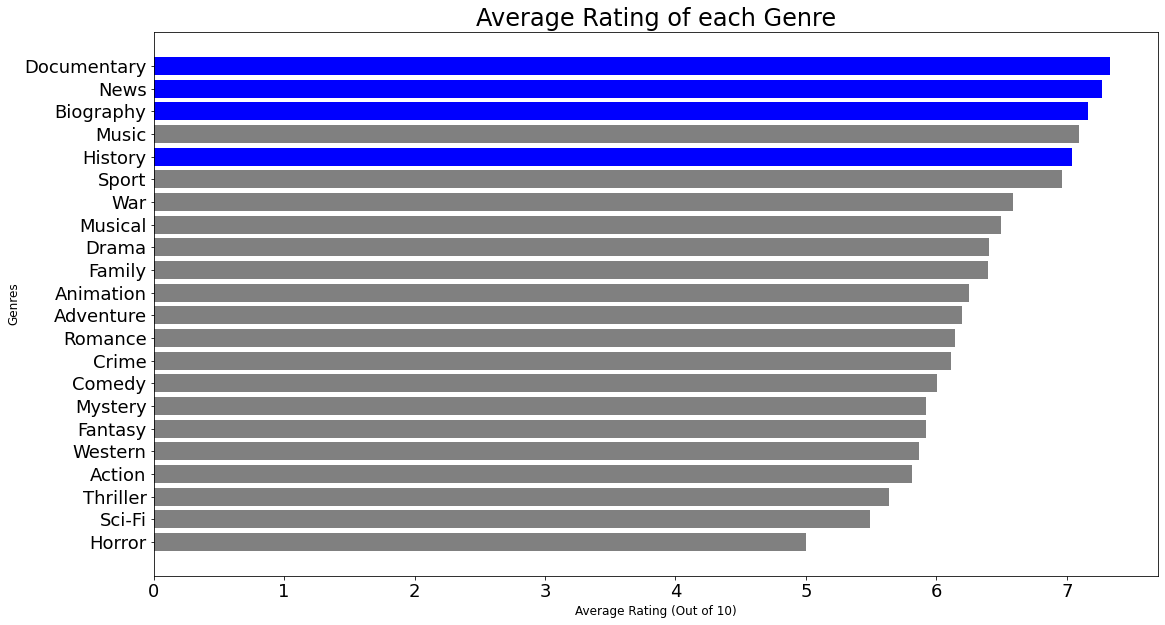

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.barh(width = averagerating, y = genres, color=['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
                                                  'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
                                                 'b', 'gray', 'b', 'b', 'b'])
ax.set_title('Average Rating of each Genre', fontsize = 24)
ax.set_xlabel('Average Rating (Out of 10)', fontsize = 12)
ax.set_ylabel('Genres', fontsize = 12)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18);

This horizontal bar chart shows us the leading genre in average rating is 'Documentary' with an average rating of 7.33. We can actually see that 4 of the top 5 average rated categories are 'Documentary', 'News', 'Biography', and 'History'. These top categories could probably all be put under the umbrella category of history. I think that moving forward with a new production company, Microsoft should invest in producing material that historically significant.

###  The merging of `bom_movie_gross` and `movie_basics`

In [19]:
cbom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
cbom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [20]:
gross_basics_result = cmovie_basics.merge(cbom_movie_gross, left_on='primary_title', right_on='title') 
gross_basics_result.head()
# joined copies of bom_movie_gross and movie_basics to get genres and domestic_gross into one dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0315642,Wazir,Wazir,2016,103.0,Drama,Wazir,Relbig.,1100000.0,NaN,2016
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,On the Road,IFC,744000.0,8000000,2012
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,On the Road,IFC,744000.0,8000000,2012


In [21]:
gross_basics_result.info()
# look at the data types of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7471 entries, 0 to 7470
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         7471 non-null   object 
 1   primary_title    7471 non-null   object 
 2   original_title   7471 non-null   object 
 3   start_year       7471 non-null   int64  
 4   runtime_minutes  7262 non-null   float64
 5   genres           7471 non-null   object 
 6   title            7471 non-null   object 
 7   studio           7465 non-null   object 
 8   domestic_gross   7419 non-null   float64
 9   foreign_gross    4729 non-null   object 
 10  year             7471 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 700.4+ KB


In [22]:
len(gross_basics_result.loc[gross_basics_result['genres'] == 'None'])
# Because there are only a few results where genres value is none, I will drop these rows.

40

In [23]:
gross_basics_result = gross_basics_result.drop(gross_basics_result[gross_basics_result['genres'] == 'None'].index)
gross_basics_result.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,Wazir,Relbig.,1100000.0,NaN,2016
2,tt0315642,Wazir,Wazir,2016,103.0,Drama,Wazir,Relbig.,1100000.0,NaN,2016
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,On the Road,IFC,744000.0,8000000,2012
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,On the Road,IFC,744000.0,8000000,2012


In [24]:
len(gross_basics_result[gross_basics_result['domestic_gross'].isna()])
# There are 52 values that are entered as NaN in the in the domestic_gross column so we will change them to 0 to be able to
#calculate domestic_gross#  without a hitch. We could also just drop the rows considering 52 rows is not a significant amount
# in this size of data.

52

In [25]:
gross_basics_result['domestic_gross'].fillna(value=0, inplace=True)

Now that we have the desired information in the dataset we can turn the two columns 'genres' and 'domestic_gross' to see which genre brought in based on box office sales.

### The Plot

In [26]:
gross_genres_result = gross_basics_result[['genres', 'domestic_gross']].groupby(by='genres').mean('domestic_gross').sort_values('domestic_gross')
gross_genres_result.reset_index(inplace=True)
gross_genres_result['domestic_gross'] = gross_genres_result['domestic_gross'].map(int)
gross_genres_result

,genres,domestic_gross
0,News,3640900
1,War,5309439
2,Romance,15179728
3,Documentary,16297344
4,Drama,16552013
5,Music,17318187
6,History,19752835
7,Biography,20981643
8,Mystery,22508438
9,Crime,23980875


In [27]:
genres2 = list(gross_genres_result['genres'])
genres2

['News',
 'War',
 'Romance',
 'Documentary',
 'Drama',
 'Music',
 'History',
 'Biography',
 'Mystery',
 'Crime',
 'Western',
 'Horror',
 'Thriller',
 'Musical',
 'Comedy',
 'Sport',
 'Family',
 'Fantasy',
 'Action',
 'Animation',
 'Adventure',
 'Sci-Fi']

In [28]:
domestic_gross = list(gross_genres_result['domestic_gross'])

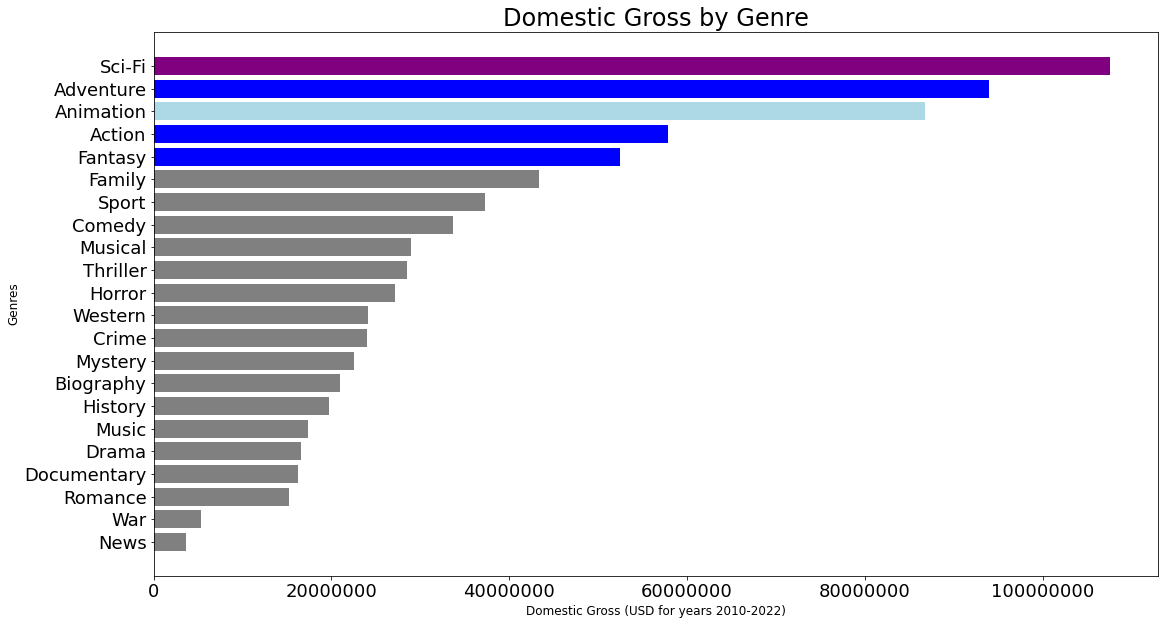

In [29]:
fig, ax = plt.subplots(figsize = (18, 10))

ax.barh(width = domestic_gross, y = genres2, color=['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
                                                    'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'b',
                                                    'b', 'lightblue', 'b', 'purple'])
ax.ticklabel_format(axis='x', style='plain')
ax.set_title('Domestic Gross by Genre', fontsize = 24)
ax.set_xlabel('Domestic Gross (USD for years 2010-2022)', fontsize = 12)
ax.set_ylabel('Genres', fontsize = 12)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18);

This visualization shows us that the top five genres people will pay to see in theaters are Sci-Fi, Adventure, Animation, Action, and Fantasy. Sci-Fi really pulls in the money as far as people paying to go see movies in theaters. Based on the timeframe of this dataset (within the last 12 years) what with the technology growing and changing at such a rapid pace, it makes sense that science fiction is drawing bigger audiences. It would be a safe bet for Microsoft to move forward in producing movies and television heavily science fiction based.

The 'Animation' genre is highlighted in light blue for our exploration of ROI (Return on Investment) later on. ROIs will give us more insight into the actual money the production company will make.

### The merging of `tmdb_movies` and `movie_basics`

In [30]:
ctmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
ctmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
tmdb_movie_basics_df = cmovie_basics.merge(ctmdb_movies, left_on='primary_title', right_on='original_title')
tmdb_movie_basics_df.head()
# This dataframe shows genres and popularity in a single table

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,Horror,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0112502,Bigfoot,Bigfoot,2017,NaN,Thriller,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
3,tt4503112,Bigfoot,Bigfoot,2018,NaN,Action,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
4,tt4503112,Bigfoot,Bigfoot,2018,NaN,Horror,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26


In [32]:
tmdb_movie_basics_df['popularity'].describe()
# Looking at the range of popularity

count    41087.000000
mean         4.273815
std          5.460208
min          0.600000
25%          0.669000
50%          1.894000
75%          6.386000
max         80.773000
Name: popularity, dtype: float64

In [33]:
print('Release date min: ', tmdb_movie_basics_df['release_date'].min())
print('Release date max: ', tmdb_movie_basics_df['release_date'].max())
# In order to keep records values from too much skewness I will only look at more recently record (2000 on)

Release date min:  1946-12-25
Release date max:  2020-12-25


The timeframe for these release dates is over a 74 year period and in order to keep the numbers relevant, I will focus on the data for movies made during the 21st century.

In [34]:
tmdb_movie_basics_df = tmdb_movie_basics_df.loc[tmdb_movie_basics_df['release_date'] > '2000']
tmdb_movie_basics_df.head()

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,Horror,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0112502,Bigfoot,Bigfoot,2017,NaN,Thriller,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
3,tt4503112,Bigfoot,Bigfoot,2018,NaN,Action,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
4,tt4503112,Bigfoot,Bigfoot,2018,NaN,Horror,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26


In [35]:
print('Release date min: ', tmdb_movie_basics_df['release_date'].min())
print('Release date max: ', tmdb_movie_basics_df['release_date'].max())

Release date min:  2000-04-28
Release date max:  2020-12-25


In [36]:
print('popularity min: ', tmdb_movie_basics_df['popularity'].min())
print('popularity max: ', tmdb_movie_basics_df['popularity'].max())

popularity min:  0.6
popularity max:  80.773


There is a large range in popularity of each movie but because movies with more than one genre are dispersed as such, the mean of popularity should not be skewed too far left or right. We will leave that 'popularity' as is. Now we can plot our data.

### The Plot

In [37]:
movie_basics_result = tmdb_movie_basics_df[['genres', 'popularity']].groupby(by='genres').mean('popularity').sort_values('popularity')
movie_basics_result.reset_index(inplace=True)
movie_basics_result

,genres,popularity
0,Adult,0.696500
1,Short,1.345000
2,News,1.616402
3,Documentary,2.098696
4,Talk-Show,2.407000
5,Reality-TV,3.243200
6,Sport,3.244047
7,Music,3.479919
8,Family,3.496832
9,Horror,3.567720


Again, I will delete the row for 'None'

In [38]:
movie_basics_result = movie_basics_result.drop(movie_basics_result.index[[11]])
movie_basics_result

,genres,popularity
0,Adult,0.696500
1,Short,1.345000
2,News,1.616402
3,Documentary,2.098696
4,Talk-Show,2.407000
5,Reality-TV,3.243200
6,Sport,3.244047
7,Music,3.479919
8,Family,3.496832
9,Horror,3.567720


In [39]:
genres3 = list(movie_basics_result['genres'])

In [40]:
popularity = list(movie_basics_result['popularity'])

Now we plot:

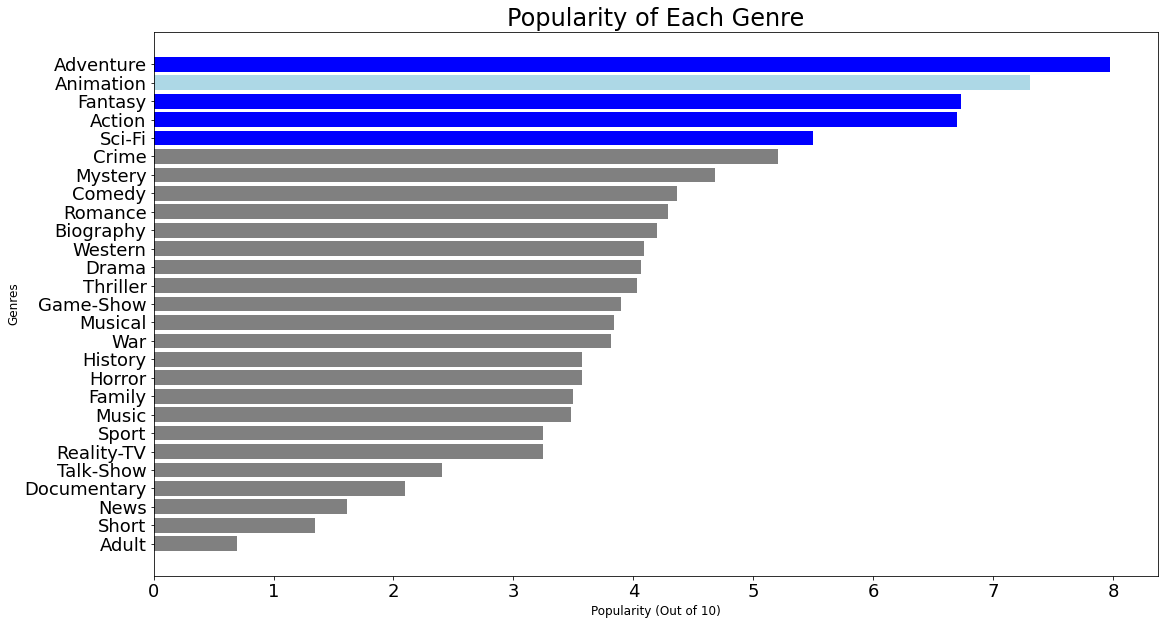

In [41]:
fig, ax = plt.subplots(figsize = (18, 10))

ax.barh(width = popularity, y = genres3, color=['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
                                                'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
                                                'b', 'b', 'b', 'lightblue', 'b'])
ax.ticklabel_format(axis='x', style='plain')
ax.set_title('Popularity of Each Genre', fontsize = 24)
ax.set_xlabel('Popularity (Out of 10)', fontsize = 12)
ax.set_ylabel('Genres', fontsize = 12)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18);

Based on the chart above, 'Adventure' is the overwhelming winner in popularity at 7.9 where as 'Adult' genres are rated at .69. The top 5 most popular genres are 'Adventure', 'Animation', 'Fantasy', 'Action', and'Sci-Fi'. This visualization validates the most previous visualization that 'Sci-Fi', 'Adventure', and 'Action' are going to bring in the most viewers and money. Again, the 'Animation' genre is highlighted in light blue for comparisons in our upcoming visualization.

### The merging of `tn_movie_budgets` and `rt_movie_info`

In [42]:
ctn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
ctn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
crt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
crt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Merging these two datasets will put genre, production budget, worldwide gross, and domestic gross into a single dataframe. First I need to transform the gross and budget columns in `ctn_movie_budgets` to integers and then I will need to explode the `genre` column in `crt_movie_info`.

In [44]:
domestic_gross_almost = ctn_movie_budgets['domestic_gross'].str.replace(',', '')

In [45]:
stripped_domestic_gross_almost = domestic_gross_almost.str.strip('$')

In [46]:
ctn_movie_budgets['domestic_gross_int'] = stripped_domestic_gross_almost.astype(int)
ctn_movie_budgets['domestic_gross_int']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross_int, Length: 5782, dtype: int64

In [47]:
worldwide_gross_almost = ctn_movie_budgets['worldwide_gross'].str.replace(',', '')

In [48]:
stripped_worldwide_gross_almost = worldwide_gross_almost.str.strip('$')

In [49]:
ctn_movie_budgets['worldwide_gross_int'] = stripped_worldwide_gross_almost.astype(int)
ctn_movie_budgets['worldwide_gross_int']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross_int, Length: 5782, dtype: int64

In [50]:
production_budget_almost = ctn_movie_budgets['production_budget'].str.replace(',', '')

In [51]:
stripped_production_budget_almost = production_budget_almost.str.strip('$')

In [52]:
ctn_movie_budgets['production_budget_int'] = stripped_production_budget_almost.astype(int)
ctn_movie_budgets['production_budget_int']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget_int, Length: 5782, dtype: int64

In [53]:
ctn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_int,worldwide_gross_int,production_budget_int
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",760507625,2776345279,425000000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875,1045663875,410600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",42762350,149762350,350000000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868,1403013963,330600000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382,1316721747,317000000
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,0,7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",48482,240495,6000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,1338,5000
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,0,1400


create a column for Return on Investiment (ROI) which will be calculated by subtracting production budget from worldwide gross (which includes domestic gross). Thisshould return an accurate estimation of the ROI

In [54]:
ctn_movie_budgets['ROI'] = ctn_movie_budgets['worldwide_gross_int'] - ctn_movie_budgets['production_budget_int']
ctn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_int,worldwide_gross_int,production_budget_int,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",760507625,2776345279,425000000,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875,1045663875,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",42762350,149762350,350000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868,1403013963,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382,1316721747,317000000,999721747
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,0,7000,-7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",48482,240495,6000,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,1338,5000,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,0,1400,-1400


Some of the values for both domestic_gross and worldwide_gross are missing which has a large effect on the ROI of any of the movie genres. So because of this, I am going to change the ROI values that are negative to 0. This should help with the radical skew we would see in the graphs.

In [55]:
ctn_movie_budgets['ROI'] = np.where((ctn_movie_budgets['ROI'] < 0), 0, ctn_movie_budgets.ROI)

In [56]:
ctn_movie_budgets
# This is the final dataset that I will be merging with another dataset

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_int,worldwide_gross_int,production_budget_int,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",760507625,2776345279,425000000,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875,1045663875,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",42762350,149762350,350000000,0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868,1403013963,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382,1316721747,317000000,999721747
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,0,7000,0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",48482,240495,6000,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,1338,5000,0
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,0,1400,0


Now we will clean up the other dataset to prepare for the merge.

In [57]:
crt_movie_info.head()
# It looks like the genre column needs to be exploded

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [58]:
crt_movie_info['genre'] = crt_movie_info['genre'].map(str)
crt_movie_info['genre'] = crt_movie_info['genre'].str.split('|')
crt_movie_info['genre'].explode
crt_movie_info = crt_movie_info.explode('genre').reset_index(drop=True)
crt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
2,1,"This gritty, fast-paced, and innovative police...",R,Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [59]:
print(crt_movie_info.columns)
print(ctn_movie_budgets.columns)
# Find which columns these two dataframes have in common (theater_date and release_date)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'domestic_gross_int', 'worldwide_gross_int',
       'production_budget_int', 'ROI'],
      dtype='object')


In [60]:
crt_movie_info['theater_date'] = pd.to_datetime(crt_movie_info['theater_date'])
crt_movie_info['theater_date'] 
# change data type into datetime

0      1971-10-09
1      1971-10-09
2      1971-10-09
3      2012-08-17
4      2012-08-17
          ...    
3576   2001-09-27
3577   2001-09-27
3578   2001-09-27
3579   2001-09-27
3580   2001-09-27
Name: theater_date, Length: 3581, dtype: datetime64[ns]

In [61]:
ctn_movie_budgets['release_date'] = pd.to_datetime(ctn_movie_budgets['release_date'])
ctn_movie_budgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

Merge rt_movie_info with tn_movie_budgets on the columns that they have in common:

In [62]:
budgets_genres = crt_movie_info.merge(ctn_movie_budgets, left_on =['theater_date'], right_on=['release_date'])
budgets_genres.head()

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_int,worldwide_gross_int,production_budget_int,ROI
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,...,71,1971-10-09,The French Connection,"$2,200,000","$41,158,757","$41,158,757",41158757,41158757,2200000,38958757
1,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,...,71,1971-10-09,The French Connection,"$2,200,000","$41,158,757","$41,158,757",41158757,41158757,2200000,38958757
2,1,"This gritty, fast-paced, and innovative police...",R,Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,...,71,1971-10-09,The French Connection,"$2,200,000","$41,158,757","$41,158,757",41158757,41158757,2200000,38958757
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,81,2012-08-17,The Expendables 2,"$100,000,000","$85,028,192","$311,979,256",85028192,311979256,100000000,211979256
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,89,2012-08-17,ParaNorman,"$60,000,000","$56,003,051","$108,119,662",56003051,108119662,60000000,48119662


In [63]:
budgets_genres['genre'].unique()

array(['Action and Adventure', 'Classics', 'Drama',
       'Science Fiction and Fantasy', 'Art House and International',
       'Horror', 'Mystery and Suspense', 'Musical and Performing Arts',
       'Kids and Family', 'Comedy', 'Documentary', 'Special Interest',
       'Romance', 'Sports and Fitness', 'Animation',
       'Faith and Spirituality', 'Western', 'Television', 'Cult Movies'],
      dtype=object)

In [64]:
genres_list = ['Action and Adventure', 'Classics', 'Drama', 'Science Fiction and Fantasy', 'Art House and International',
                 'Horror', 'Mystery and Suspense', 'Musical and Performing Arts', 'Kids and Family', 'Comedy', 'Documentary',
                 'Special Interest', 'Romance', 'Sports and Fitness', 'Animation', 'Faith and Spirituality', 'Western',
                 'Television', 'Cult Movies']
# Create a list from the unique values in 'genres' to be used for plotting later in the next section

### The Plot

Quick note: This dataframe covered a large portion of time (1933-2018). So what I decided to do was to make three separate plots. One plot with the full time period (1933-2018), the time preiod during the 20th century (1933-1999), and a final plot of this past 21st century so far (2000-2018). With this, I would be able to compare which genres were bringing production companies the most money.

In [65]:
genres_ROI_1933_2018 = budgets_genres[['genre', 'ROI']].groupby(by='genre').mean('ROI').sort_values('ROI')
genres_ROI_1933_2018.reset_index(inplace=True)
genres_ROI_1933_2018
# All genres and ROI for film productions from 1933-2018

,genre,ROI
0,Classics,4.254453e+07
1,Musical and Performing Arts,4.564841e+07
2,Art House and International,4.605882e+07
3,Special Interest,4.798620e+07
4,Television,4.885916e+07
5,Horror,5.053645e+07
6,Documentary,5.176360e+07
7,Science Fiction and Fantasy,5.426529e+07
8,Action and Adventure,5.714014e+07
9,Drama,5.875769e+07


In [66]:
bg_2000_2018 = budgets_genres.loc[budgets_genres['release_date'] >= '2000'] # Only to include genres after 2000
bg_2000_2018.head()

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_int,worldwide_gross_int,production_budget_int,ROI
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,81,2012-08-17,The Expendables 2,"$100,000,000","$85,028,192","$311,979,256",85028192,311979256,100000000,211979256
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,89,2012-08-17,ParaNorman,"$60,000,000","$56,003,051","$108,119,662",56003051,108119662,60000000,48119662
5,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,96,2012-08-17,Sparkle,"$10,000,000","$24,397,469","$24,660,323",24397469,24660323,10000000,14660323
6,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,4,2012-08-17,The Awakening,"$4,900,000","$95,933","$6,924,321",95933,6924321,4900000,2024321
7,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,"600,000",...,26,2012-08-17,Robot & Frank,"$2,500,000","$3,317,468","$4,934,356",3317468,4934356,2500000,2434356


In [67]:
genres_ROI_2000_2018 = bg_2000_2018[['genre', 'ROI']].groupby(by='genre').mean('ROI').sort_values('ROI')
genres_ROI_2000_2018.reset_index(inplace=True)
genres_ROI_2000_2018
# Genre and ROI for film productions from 2000-2018

,genre,ROI
0,Musical and Performing Arts,4.501907e+07
1,Special Interest,4.882934e+07
2,Television,4.885916e+07
3,Classics,4.914829e+07
4,Action and Adventure,5.173637e+07
5,Science Fiction and Fantasy,5.356831e+07
6,Art House and International,5.401014e+07
7,Documentary,5.443129e+07
8,Drama,6.272753e+07
9,Comedy,6.404225e+07


In [68]:
bg_1933_1999 = budgets_genres.loc[budgets_genres['release_date'] <= '1999'] # Only to include genres before 1999
bg_1933_1999.head()

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_int,worldwide_gross_int,production_budget_int,ROI
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,...,71,1971-10-09,The French Connection,"$2,200,000","$41,158,757","$41,158,757",41158757,41158757,2200000,38958757
1,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,...,71,1971-10-09,The French Connection,"$2,200,000","$41,158,757","$41,158,757",41158757,41158757,2200000,38958757
2,1,"This gritty, fast-paced, and innovative police...",R,Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,...,71,1971-10-09,The French Connection,"$2,200,000","$41,158,757","$41,158,757",41158757,41158757,2200000,38958757
33,5,Illeana Douglas delivers a superb performance ...,R,Drama,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,...,71,1996-09-13,Maximum Risk,"$25,000,000","$14,102,929","$51,702,929",14102929,51702929,25000000,26702929
34,5,Illeana Douglas delivers a superb performance ...,R,Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,...,71,1996-09-13,Maximum Risk,"$25,000,000","$14,102,929","$51,702,929",14102929,51702929,25000000,26702929


In [69]:
genres_ROI_1933_1999 = bg_1933_1999[['genre', 'ROI']].groupby(by='genre').mean('ROI').sort_values('ROI')
genres_ROI_1933_1999.reset_index(inplace=True)
genres_ROI_1933_1999
# Genre and ROI for film productions from 1933-1999

,genre,ROI
0,Faith and Spirituality,0.000000e+00
1,Animation,9.343976e+06
2,Horror,1.229691e+07
3,Documentary,1.352674e+07
4,Art House and International,2.651021e+07
5,Classics,3.340085e+07
6,Special Interest,3.635087e+07
7,Comedy,4.603532e+07
8,Drama,4.616306e+07
9,Musical and Performing Arts,4.763580e+07


There are three genres missing on this dataframe as the first two and they are: 'Sports and Fitness', 'Television', and 'Cult Movies'. I will have to make adjustments to the x-axis values when plotting.

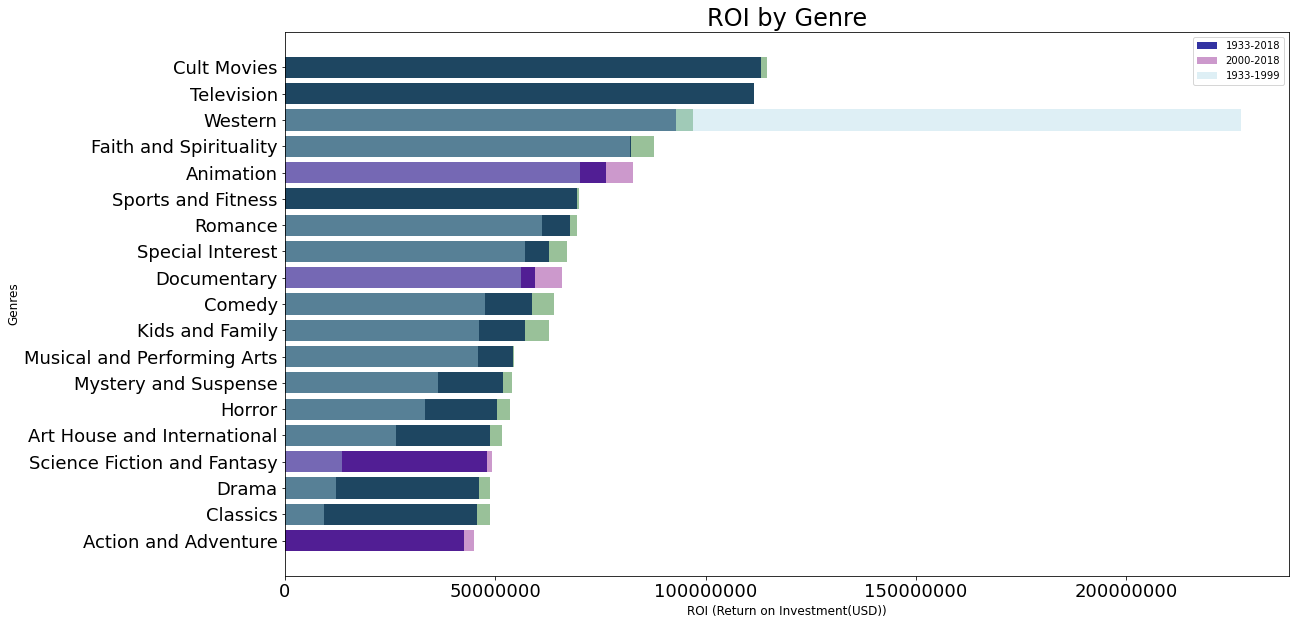

In [70]:
fig, ax = plt.subplots(figsize=(18,10))
x = genres_list
x2 = ['Action and Adventure', 'Classics', 'Drama', 'Science Fiction and Fantasy', 'Art House and International',
                 'Horror', 'Mystery and Suspense', 'Musical and Performing Arts', 'Kids and Family', 'Comedy', 'Documentary',
                 'Special Interest', 'Romance', 'Animation', 'Faith and Spirituality', 'Western']
# Needed to remove three categories that genres_ROI-1933-1999 did not have in order to run plot
y1 = genres_ROI_1933_2018['ROI']
y2 = genres_ROI_2000_2018['ROI']
y3 = genres_ROI_1933_1999['ROI']

ax.barh(x, y1, alpha = .8, color='darkblue', label = ('1933-2018'))
ax.barh(x, y2, alpha = .4, color= ['purple', 'darkgreen', 'darkgreen', 'purple', 'darkgreen', 'darkgreen', 'darkgreen',
                                   'darkgreen', 'darkgreen', 'darkgreen', 'purple', 'darkgreen', 'darkgreen',
                                   'darkgreen', 'purple', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen'], label=('2000-2018'))
ax.barh(x2, y3, alpha = .4, color = 'lightblue', label =('1933-1999'))
ax.ticklabel_format(axis='x', style='plain')
ax.set_title('ROI by Genre', fontsize = 24)
ax.set_ylabel('Genres', fontsize = 12)
ax.set_xlabel('ROI (Return on Investment(USD))', fontsize = 12)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
ax.legend();

Looking at this graph, the most important color to note is the green because those are the most recent years ROIs. Based on our other charts and graphs, 'Sci-Fi' and 'Fantasy' do not produce as much ROI as they show preference in popularity and ratings probably because the production budget in those films is much higher due to special effects, location, and the celebrity names that are drawn to those types of projects. 

We mentioned historical genres that we categorized 'Documentary' under. In this visual 'Documentary' falls almost exactly in the middle across all genres and timeframes which is a pretty solid foundation to build upon. 

The 'Animation' genre does fall in the top 6 ROIs which makes sense because it is a cheaper genre to produce. It doesn't require paying crew to travel to particular destinations or paying particularly high salaries for voice actors and it is probably just a cheaper production option all around. In the previous charts the 'Animation' genre fell within the top 5 most domestic gross and popular rated genres.

The last thing I will mention on this graph is the 'Western' genre if only to dissuade Microsoft from gravitating towards making films in this genre. Our plot shows that it made a lot more money from 1933-1999 (the light blue). The 'Western' genre is cost effective which made it a desirable genre before the 20000s. However after the 2000s this genre did not produce as much ROI because we now have accessibility to more special effects that people find more exciting.s as it does not require so many special effects that weren't available before 2000.

### Conclusion

My advice to the founders of the Microsoft Production Company would be to focus your beginnning projects on genres having to do with historical significance (history) or, to reach a larger audience, adventure/action. While starting out, look towards producing projects that are animated as this will cost less. If, however, production budget is not a concern, there is a very large fanbase for science fiction and fantasy genres. Although they may be more expensive to produce, they are the most sought after genres in todays audience. 

In [71]:
conn.close()